# COMP 579 Assignment 1

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to 
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Gaussian Bandit

In [3]:

class GaussianBandit:
  """
    A class representing a Gaussian multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    mean : list or np.ndarray
        List of mean rewards for each arm.
    variance : float
        Variance of the rewards for all arms.

    Methods
    -------
    sample(arm_index)
        Samples a reward from the specified arm based on a Gaussian distribution.
    """

  # TODO:
  def __init__(self, num_arms, mean, variance):
    self.num_arms = num_arms
    self.mean = mean
    self.variance = variance

  def sample(self, arm_index):
    return np.random.normal(loc=self.mean[arm_index], scale=self.variance)

 

In [4]:
# TODO:
delta = 0.5
num_arms = 3
means = [0.5, 0.5 - delta, 0.5 + delta]
variance = 0.1 #Changed to 0.1 from 0.01
num_samples = 50

three_arm_gaussian_bandit = GaussianBandit(num_arms=num_arms, mean=means, variance=variance)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [] 
    for i in range(0, num_samples):
        rewards.append(three_arm_gaussian_bandit.sample(action))
    action_rewards.append(rewards)


### Graphs

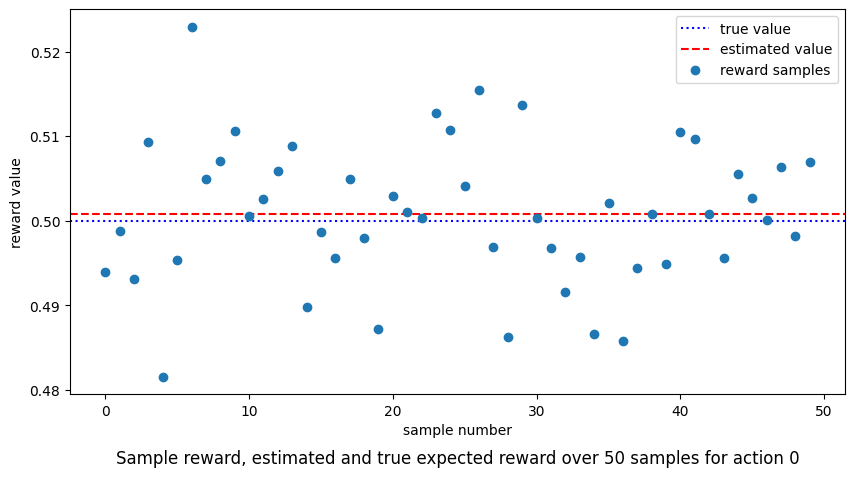

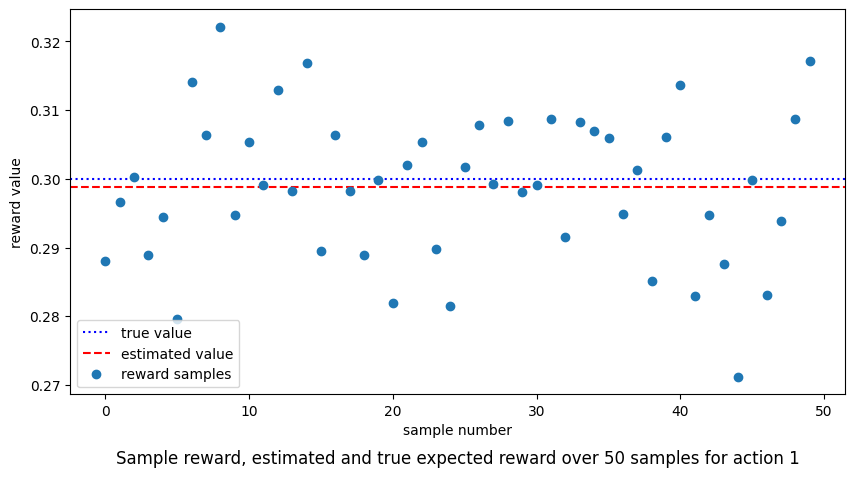

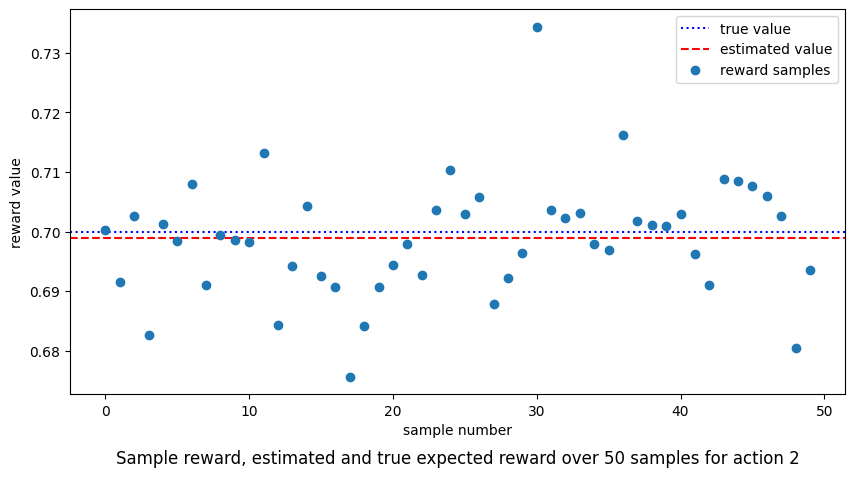

In [8]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = means[action]
  estimated_value = np.mean(action_rewards[action])

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [21]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  value = 0.0
  for i in range(0, len(reward_samples)):
    value = value + alpha*(reward_samples[i] - value)

  return value
      

  


def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[1], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  return np.mean(reward_samples)

    
def updateDecaying(reward_samples, alpha_0=0.5, lambda_=0.01, p=0.5):
    """
    Each call to the function yields the updated estimate of the action value using an
    improved decaying learning rate.

    Parameters
    ----------
    reward_samples : array-like of int or float
        Samples of reward values from one arm of a bandit.
    alpha_0 : float, optional
        The initial learning rate (default is 0.5).
    lambda_ : float, optional
        The decay rate constant (default is 0.01).
    p : float, optional
        The power parameter for controlling decay (default is 0.5).
    """
    value = 0.0
    for i in range(0, len(reward_samples)):
        value = value + (alpha_0 / (1 + lambda_*i)**p)*(reward_samples[i] - value)
    
    return value





### Graphs

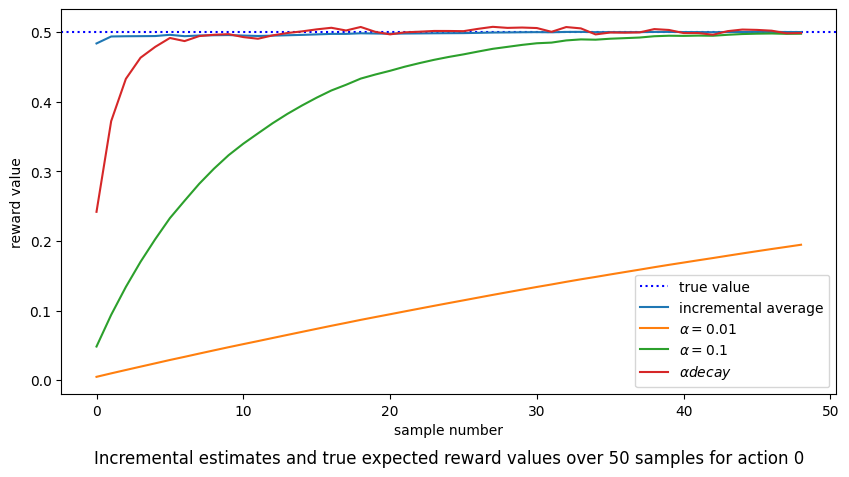

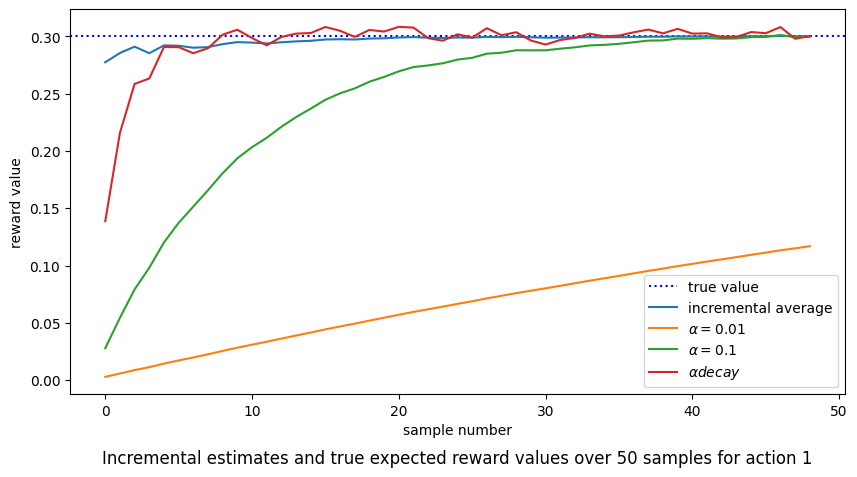

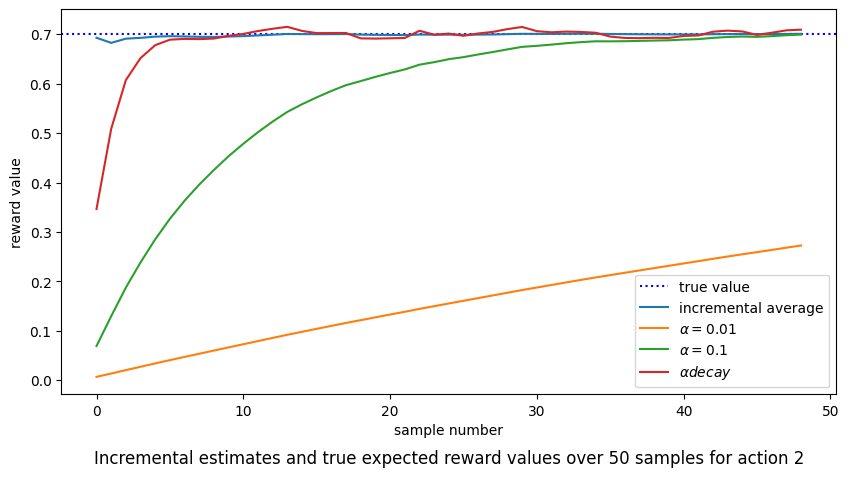

In [36]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  incr_avgs = []
  alpha_1_percent = []
  alpha_10_percent = []
  alpha_decay = []
  true_value = means[action]
  for i in range(1, 50):
    rewards = action_rewards[action][0:i]
    incr_avgs.append(updateAvg(reward_samples=rewards))
    alpha_1_percent.append(update(reward_samples=rewards, alpha=0.01))
    alpha_10_percent.append(update(reward_samples=rewards, alpha=0.1))
    alpha_decay.append(updateDecaying(reward_samples=rewards))

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")
  plt_alpha_decay, = ax.plot(alpha_decay, label = r"$\alpha decay$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

## Q3 Effect of $α$ on Estimated Q values

In [106]:
# TODO:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []
alpha_decay_runs = []

action_rewards = []
actions = range(num_arms)

for action in actions:
    rewards = [] 
    for i in range(0, num_samples):
        rewards.append(three_arm_gaussian_bandit.sample(action))
    action_rewards.append(rewards)



# TODO:
for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []
  sample_alpha_decay_by_actions = []

  for action in actions:
    for i in range(100):
      rewards = action_rewards[action][0:run]
      sample_incr_avgs_by_actions.append(updateAvg(reward_samples=rewards))
      sample_alpha_1_percent_by_actions.append(update(reward_samples=rewards, alpha=0.01))
      sample_alpha_10_percent_by_actions.append(update(reward_samples=rewards, alpha=0.1))
      sample_alpha_decay_by_actions.append(updateDecaying(reward_samples=rewards))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)
  alpha_decay_runs.append(sample_alpha_decay_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)
alpha_decay_runs = np.asarray(alpha_decay_runs)

In [107]:
# Partition and compute averages for each column section
partitions = 3
rows_per_partition = incr_avgs_runs.shape[1] // partitions

averages = [
    np.nanmean(incr_avgs_runs[:, i * rows_per_partition:(i + 1) * rows_per_partition], axis=1)
    for i in range(partitions)
]


/tmp/ipykernel_12686/1300860706.py:6: RuntimeWarning: Mean of empty slice
  np.nanmean(incr_avgs_runs[:, i * rows_per_partition:(i + 1) * rows_per_partition], axis=1)


### Graphs

/tmp/ipykernel_12686/3135345490.py:7: RuntimeWarning: Mean of empty slice
  mean_incr_avgs_by_actions = np.nanmean(incr_avgs_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)


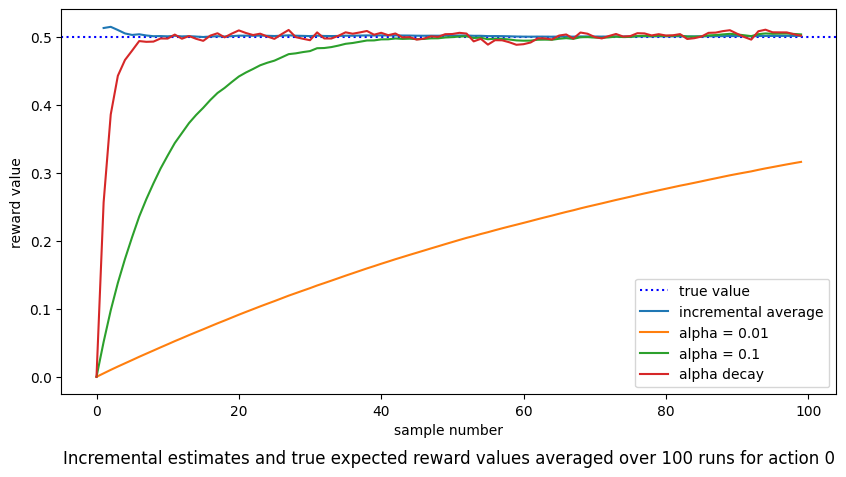

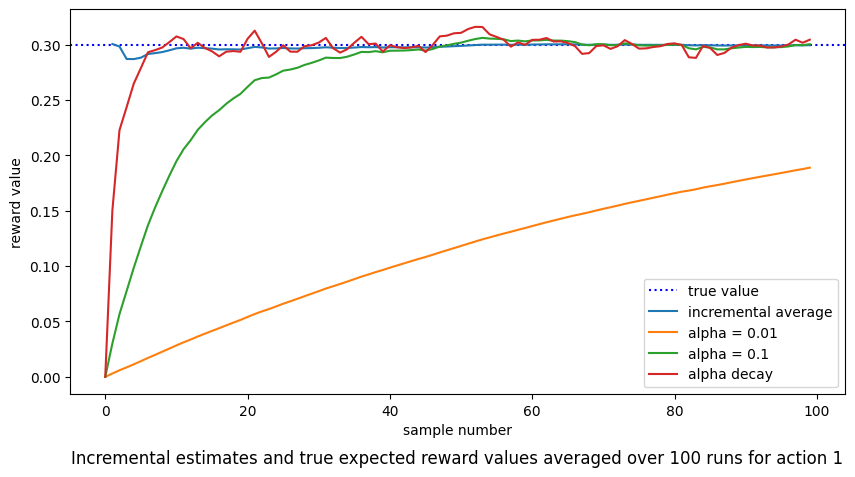

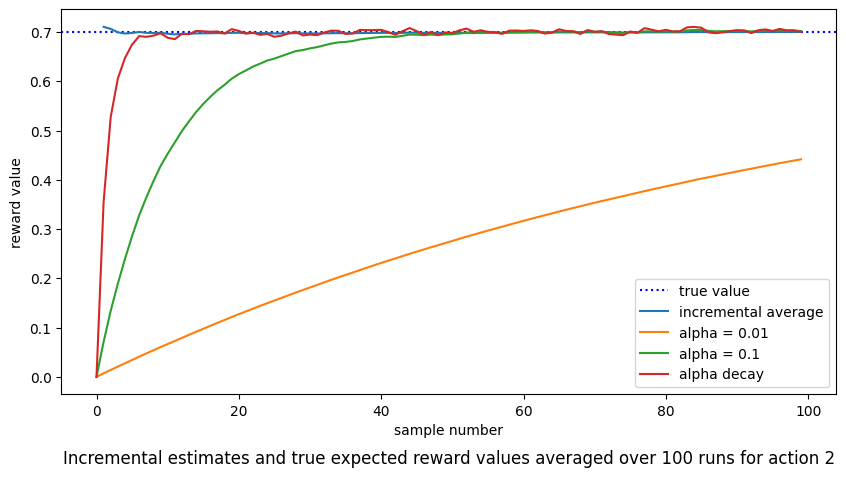

In [110]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  # TODO:
  rows_per_partition = 100
  mean_incr_avgs_by_actions = np.nanmean(incr_avgs_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)
  mean_alpha_1_percent_by_actions = np.nanmean(alpha_1_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)
  mean_alpha_10_percent_by_actions = np.nanmean(alpha_10_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)
  mean_alpha_decay_by_actions = np.nanmean(alpha_decay_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)

  true_value = means[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis=1)

  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis=1)
  std_alpha_decay_by_actions = np.std(alpha_decay_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis=1)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1) / np.sqrt(100)
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1) / np.sqrt(100)
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1) / np.sqrt(100)
  std_err_alpha_decay_by_actions = np.std(alpha_decay_runs[:, action*rows_per_partition:(action + 1)*rows_per_partition], axis = 1) / np.sqrt(100)
  
  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)
  
  plt_alpha_decay, = ax.plot(mean_alpha_decay_by_actions, label = "alpha decay")
  alpha_decay_minus_std_err = mean_alpha_decay_by_actions - std_err_alpha_decay_by_actions
  alpha_decay_plus_std_err = mean_alpha_decay_by_actions + std_err_alpha_decay_by_actions
  ax.fill_between(range(0,100), alpha_decay_minus_std_err, alpha_decay_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

### Answers


## Q4 Epsilon-greedy

In [33]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous reward over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  Q_arr = np.zeros(num_arms)
  N_arr = np.zeros(num_arms)
  total_R = 0 
  total_l = 0
  #What are these for?
  actions = []
  opt_value = 0 

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  
  epsilon_t = epsilon 

  for time_step in range(num_time_step):
    if epsilon_decay:
        epsilon_t = epsilon / (1 + lambda_*time_step)
            
    A_star = np.argwhere(Q_arr == np.amax(Q_arr)).flatten() ##For multiple maxiums
    A_random = np.random.choice(Q_arr.shape[0], 1, replace = False)
    best_action = 2 #Third action is the best action (index 2)
    optimal_action = np.random.choice(A_star.shape[0], 1, replace=False) #Random tie-break
    if random.random() <= epsilon_t:
        A =  A_random[0]
    else:
        A = optimal_action[0]
        
    curr_R = bandit.sample(A)
    N_arr[A] += 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + (1/N_arr[A])*(curr_R - Q_arr[A])
    else:
      Q_arr[A] = Q_arr[A] + alpha*(curr_R - Q_arr[A])

    R_over_t.append(curr_R)

    total_R += curr_R 
    total_R_over_t.append(total_R)

    est_is_best = 1 if A == best_action else 0 
    est_is_best_over_t.append(est_is_best)

    l_t = bandit.mean[best_action] - ((1 - epsilon_t)*Q_arr[optimal_action] + epsilon_t*Q_arr[A_random]) #Expectation of best move (mean) - Expectation of chosen Q
    l_over_t.append(l_t)

    total_l += l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

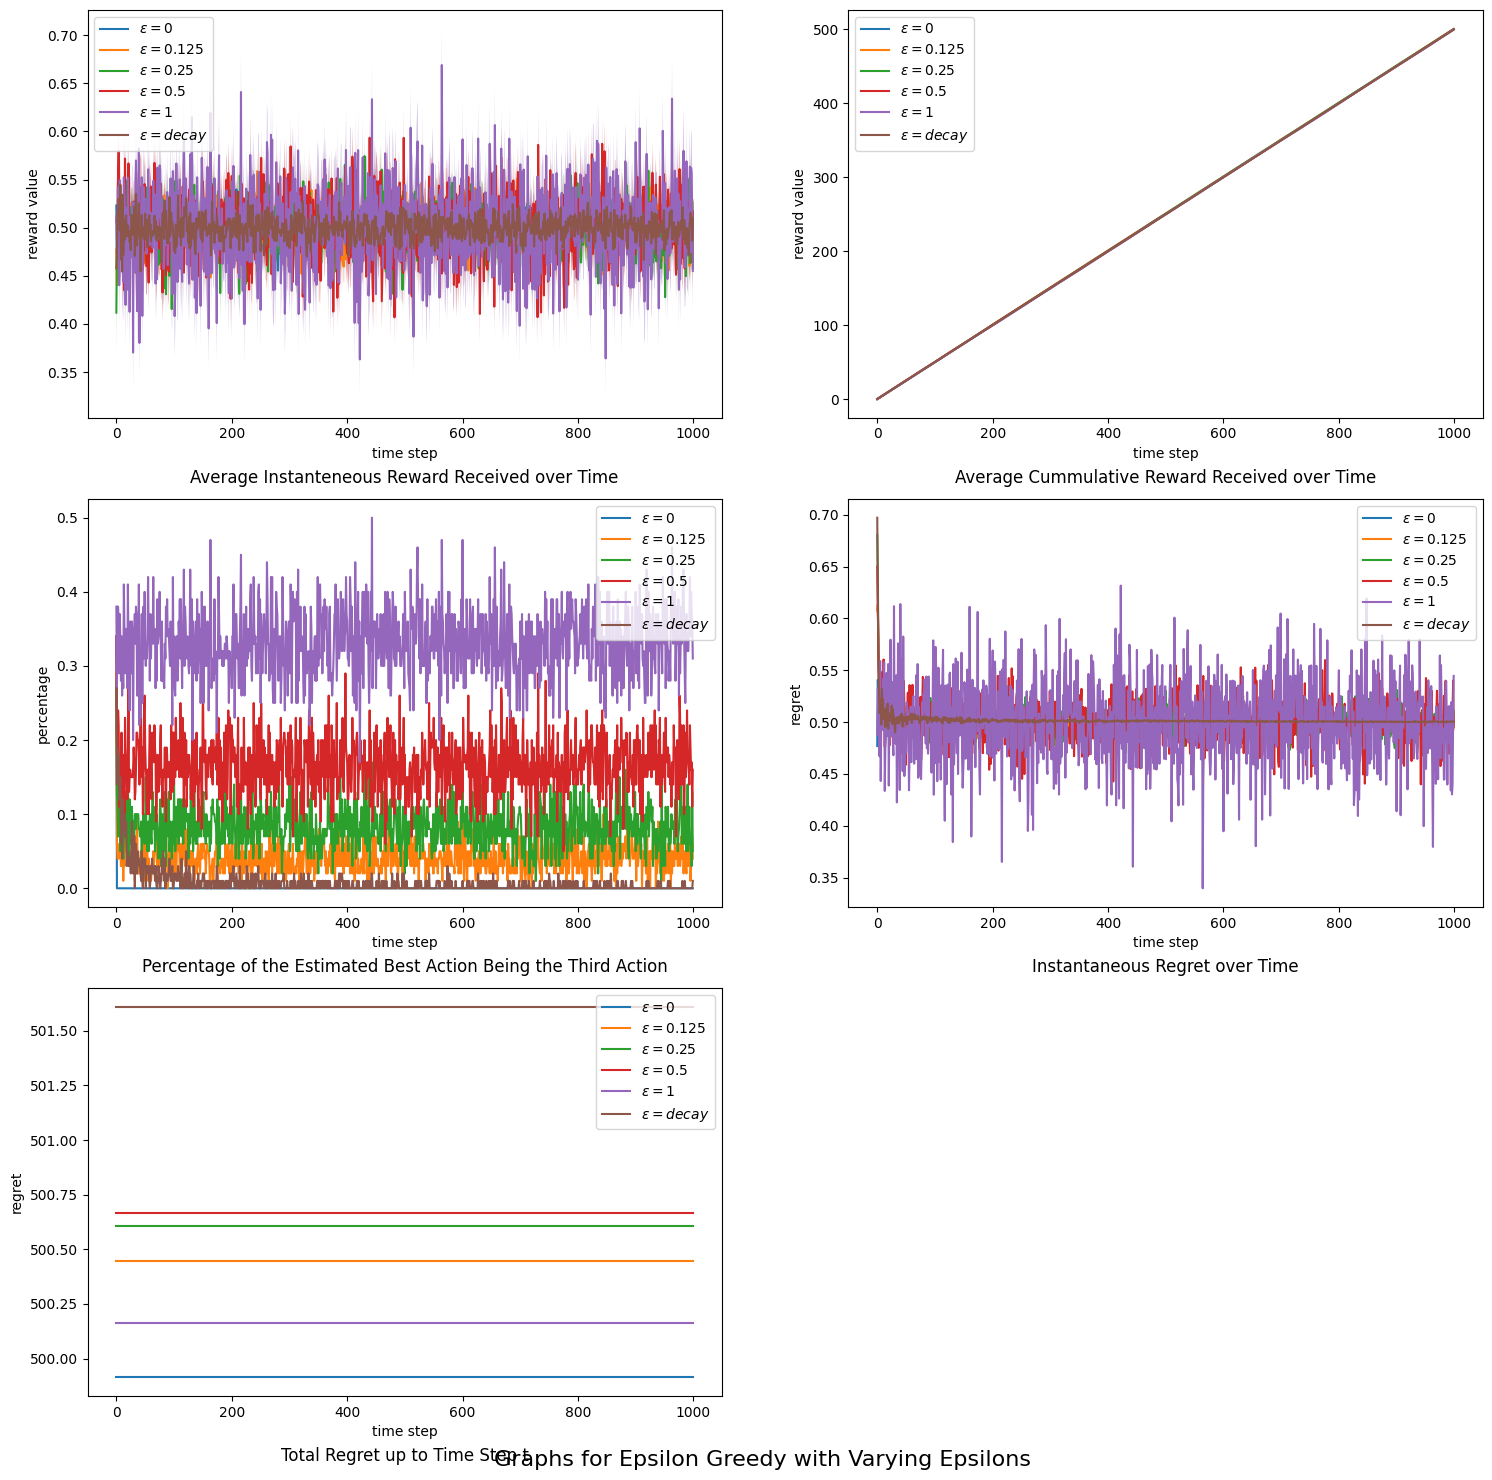

In [29]:
#TODO:
epsilons = [0, 1/8, 1/4, 1/2, 1]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          decaying_epsilon_params['epsilon_0'], 
          epsilon_decay=True, 
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

## Q5 Hyperparameters for Epsilon-greedy

To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.

### Graphs

In [16]:
def plot_greedy(epsilons, decaying_epsilon_params, alpha):
 fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

 for epsilon in epsilons + ["decay"]:

   # arrays of the data generated from 100 runs
   R_over_t_runs = []
   total_R_over_t_runs = []
   est_is_best_over_t_runs = []
   l_over_t_runs = []
   total_l_over_t_runs = []

   for run in range(100):
     if epsilon == "decay":
       R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
           three_arm_gaussian_bandit, 
           decaying_epsilon_params['epsilon_0'], 
           epsilon_decay=True, 
           alpha=alpha, 
           lambda_=decaying_epsilon_params['lambda_']
       )
     else:
       R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
           three_arm_gaussian_bandit, 
           epsilon,
           alpha=alpha
       )
     R_over_t_runs.append(R_over_t)
     total_R_over_t_runs.append(total_R_over_t)
     est_is_best_over_t_runs.append(est_is_best_over_t)
     l_over_t_runs.append(l_over_t)
     total_l_over_t_runs.append(total_l_over_t)

   R_over_t_runs = np.asarray(R_over_t_runs)
   total_R_over_t_runs = np.asarray(total_R_over_t_runs)
   est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
   l_over_t_runs = np.asarray(l_over_t_runs)
   total_l_over_t_runs = np.asarray(total_l_over_t_runs)

   # plot the mean reward over time

   mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
   std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

   axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

   R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
   R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
   axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
   # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

   axs[0,0].legend()
   axs[0,0].set_xlabel("time step")
   axs[0,0].set_ylabel("reward value")
   axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

   # plot the mean cummulative reward over time

   mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
   std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

   axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

   total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
   total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
   axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

   axs[0,1].legend()
   axs[0,1].set_xlabel("time step")
   axs[0,1].set_ylabel("reward value")
   axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

   #plot the mean percentage of the estimated best action being the first action

   est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
   plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

   axs[1,0].legend()
   axs[1,0].set_xlabel("time step")
   axs[1,0].set_ylabel("percentage")
   axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

   #plot the mean instantaneous regret over time

   l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
   axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

   axs[1,1].legend()
   axs[1,1].set_xlabel("time step")
   axs[1,1].set_ylabel("regret")
   axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

   #plot the total regret over time

   total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
   axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

   axs[2,0].legend()
   axs[2,0].set_xlabel("time step")
   axs[2,0].set_ylabel("regret")
   axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

 axs[-1, -1].axis('off')

 title = f'Graphs for Epsilon Greedy with Varying Epsilons, alpha = {alpha}'
 fig.suptitle(title, fontsize=16, y=0.05)

 plt.show()

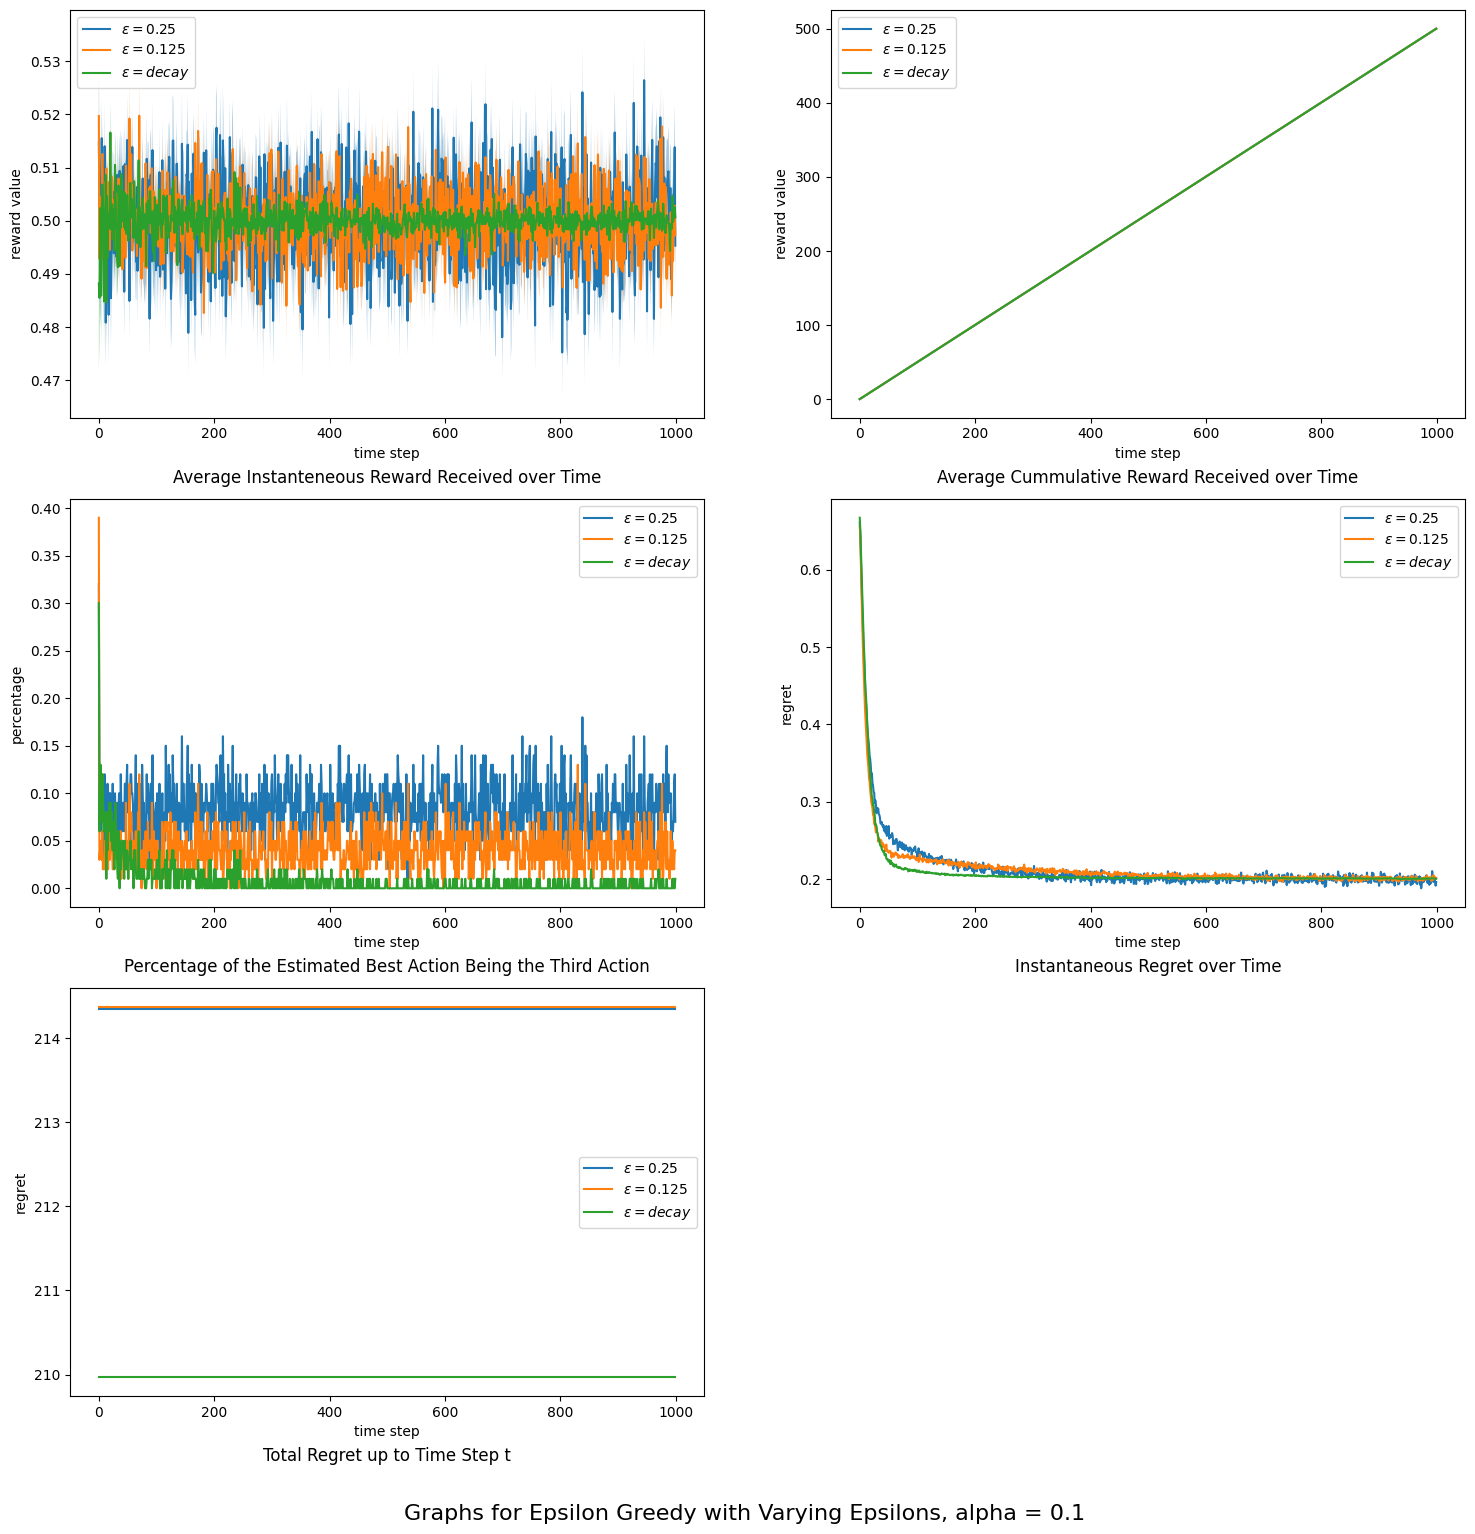

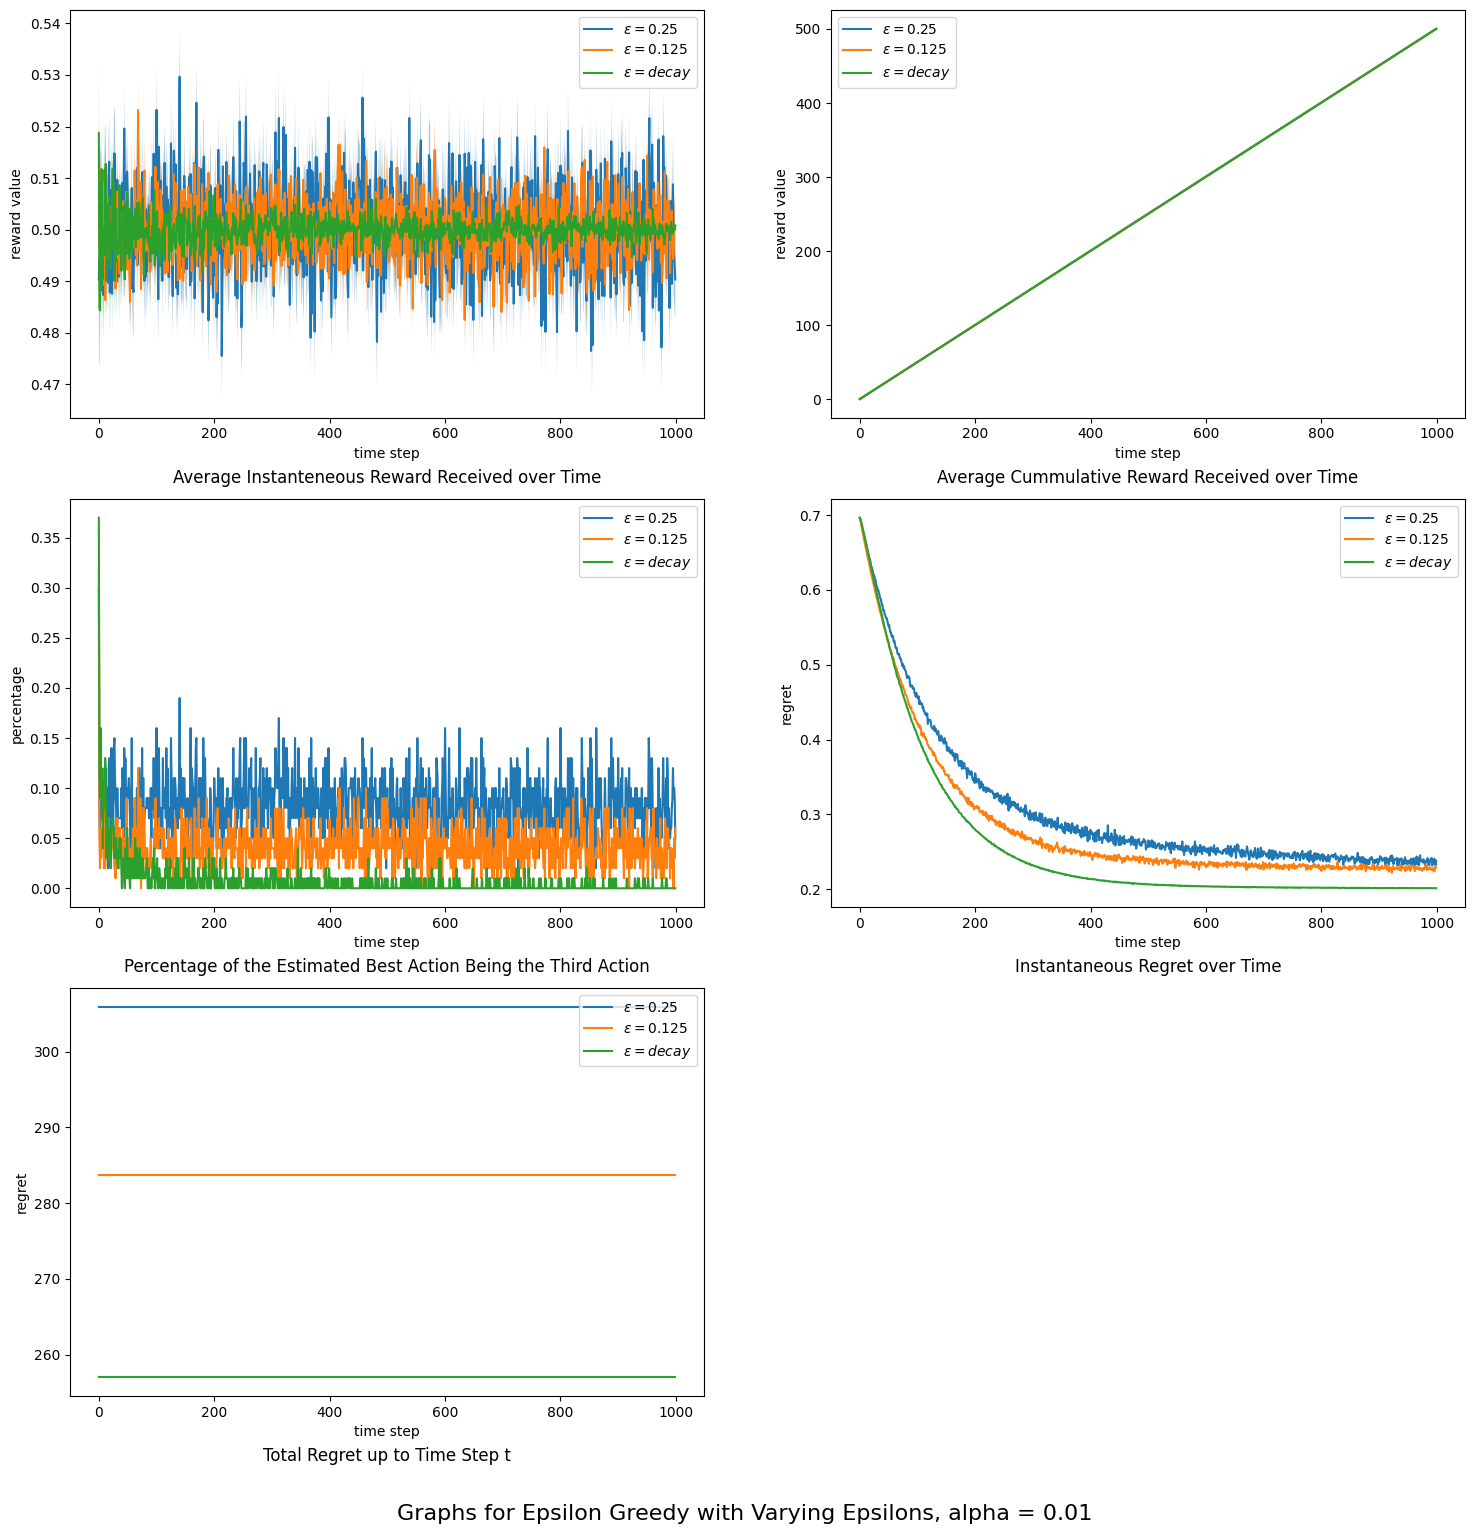

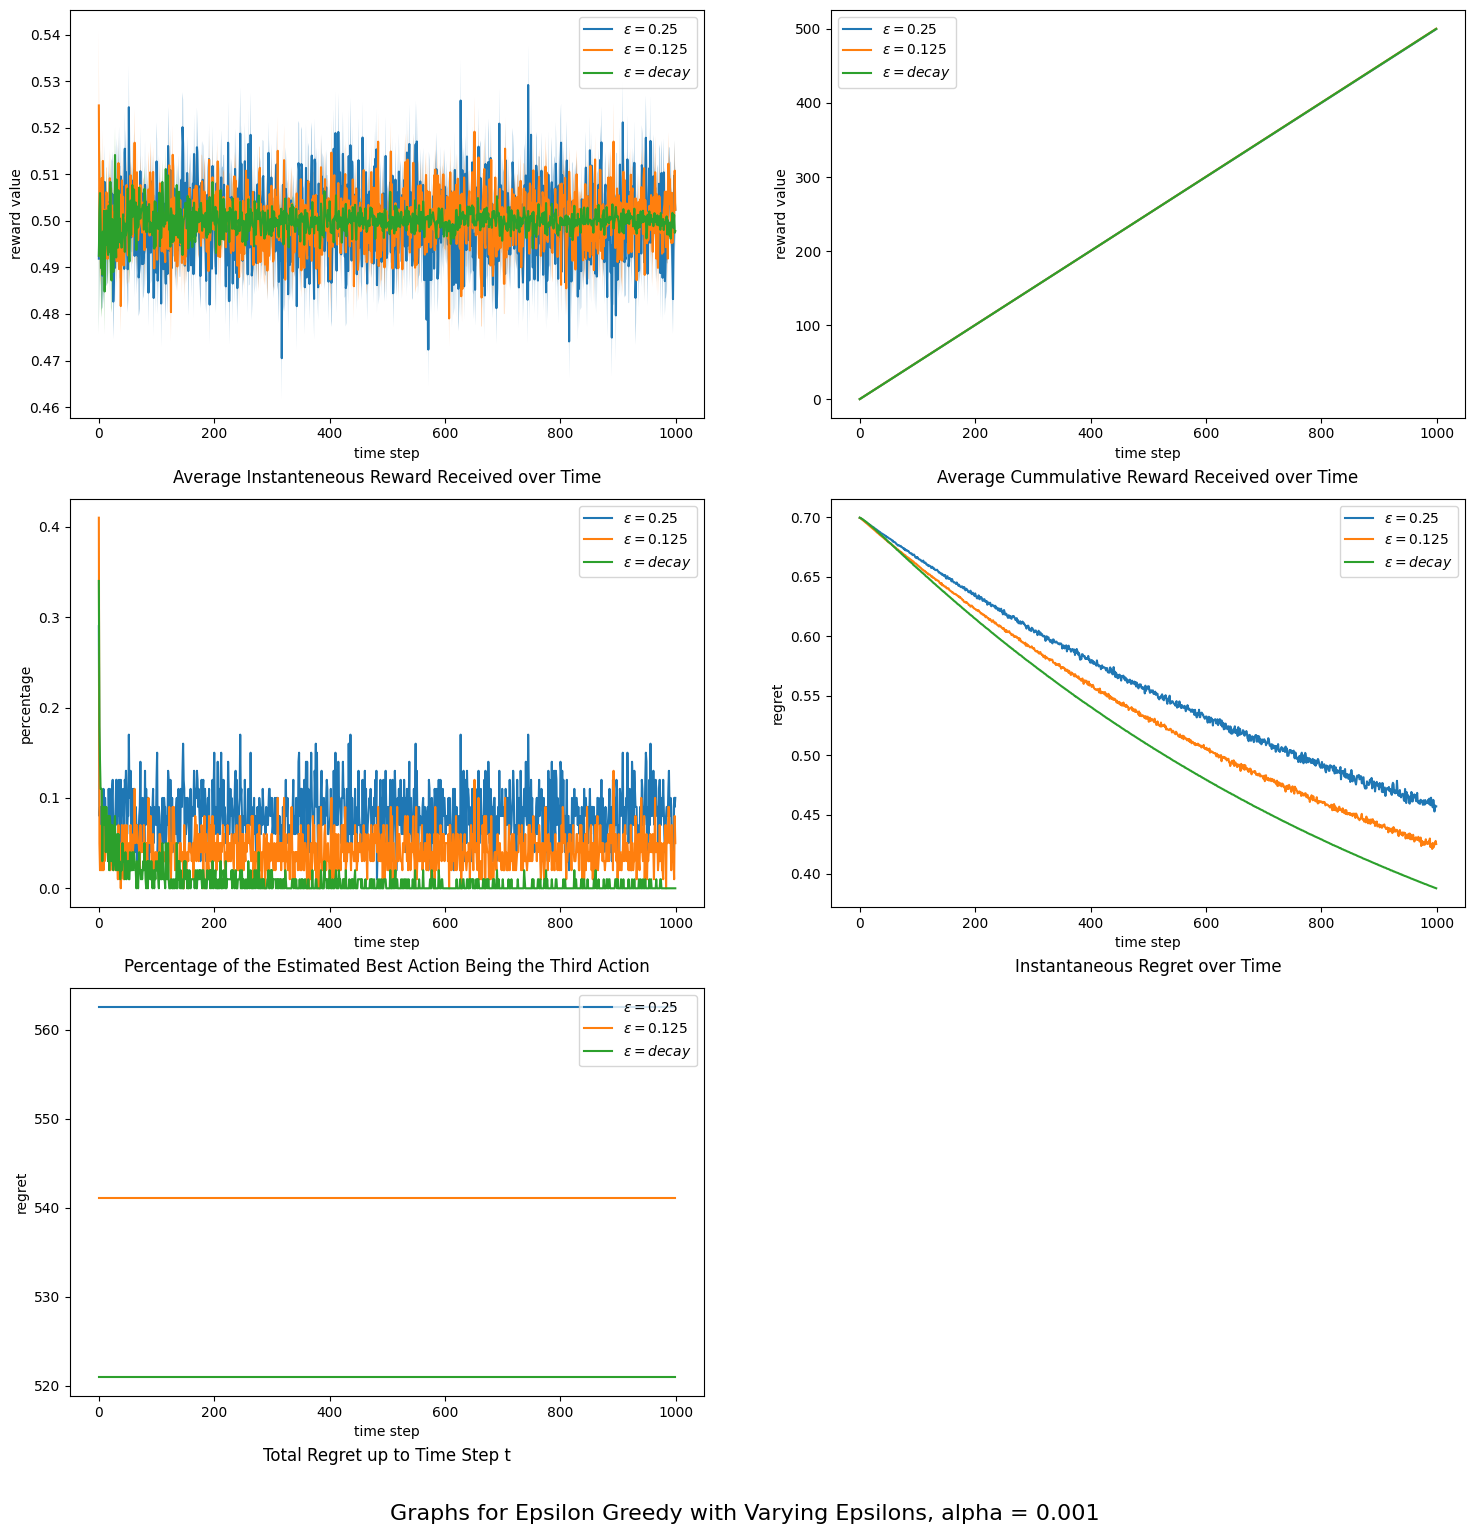

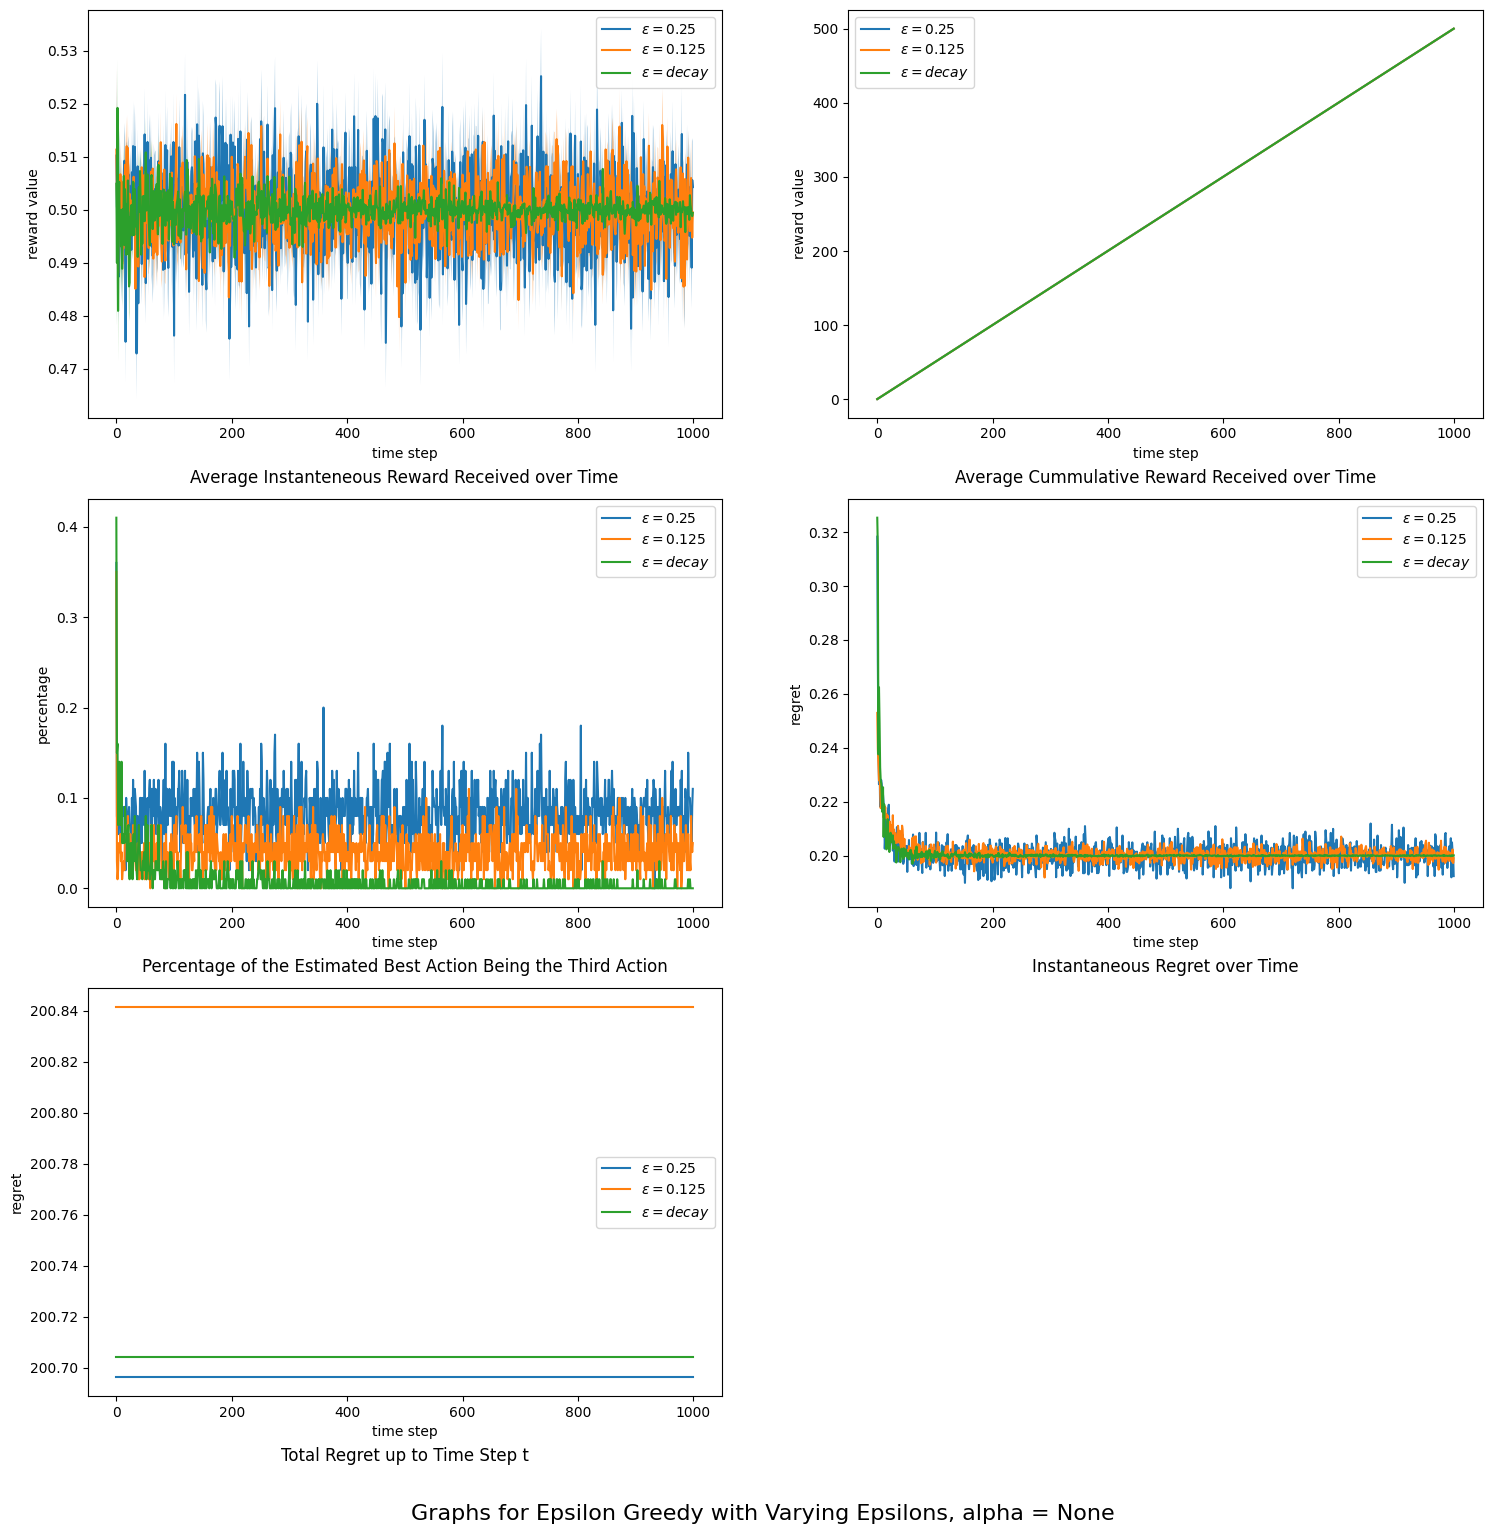

In [17]:
epsilons = [1/4, 1/8]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters
alphas = [0.1, 0.01, 0.001, None]

for alpha in alphas:
    plot_greedy(epsilons=epsilons, decaying_epsilon_params=decaying_epsilon_params, alpha = alpha)
    


### Answers

## Q6 Gradient Bandit

In [34]:
def softmax(H):
    h = H - np.max(H)
    exp = np.exp(h)
    return exp / np.sum(exp)

In [35]:
def gradient(bandit, alpha = None, num_time_step = 1000, alpha_decay=False, lambda_=0.001, p = None):
  """Gradient bandit algorithm

  Parameters
  ----------
  bandit : bandit class
      A gaussian bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. There is no incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous reward over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  H = np.zeros(num_arms)
  best_action = 2 #Third action is the best action (index 2)

  total_R = 0 
  total_l = 0

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  

  for time_step in range(num_time_step):
    policy = softmax(H)
    A = np.random.choice(num_arms, p=policy)
             
    curr_R = bandit.sample(A)
    R_over_t.append(curr_R)
    bar_R = np.average(R_over_t)

    alpha_t = alpha
    if alpha_decay:
        alpha_t = alpha / ((1 + lambda_*time_step)**(p))


    H[A] = H[A] + alpha_t*(curr_R - bar_R)*(1 - policy[A])

    for a in range(len(H)):
        if a != A:
            H[a] = H[a] - alpha_t*(curr_R - bar_R)*policy[A]


    total_R += curr_R 
    total_R_over_t.append(total_R)

    est_is_best = 1 if A == best_action else 0 
    est_is_best_over_t.append(est_is_best)

    l_t = bandit.mean[best_action] - curr_R #Expectation of best move (mean) - Reward. Proof in page: 39 of book.
    l_over_t.append(l_t)

    total_l += l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

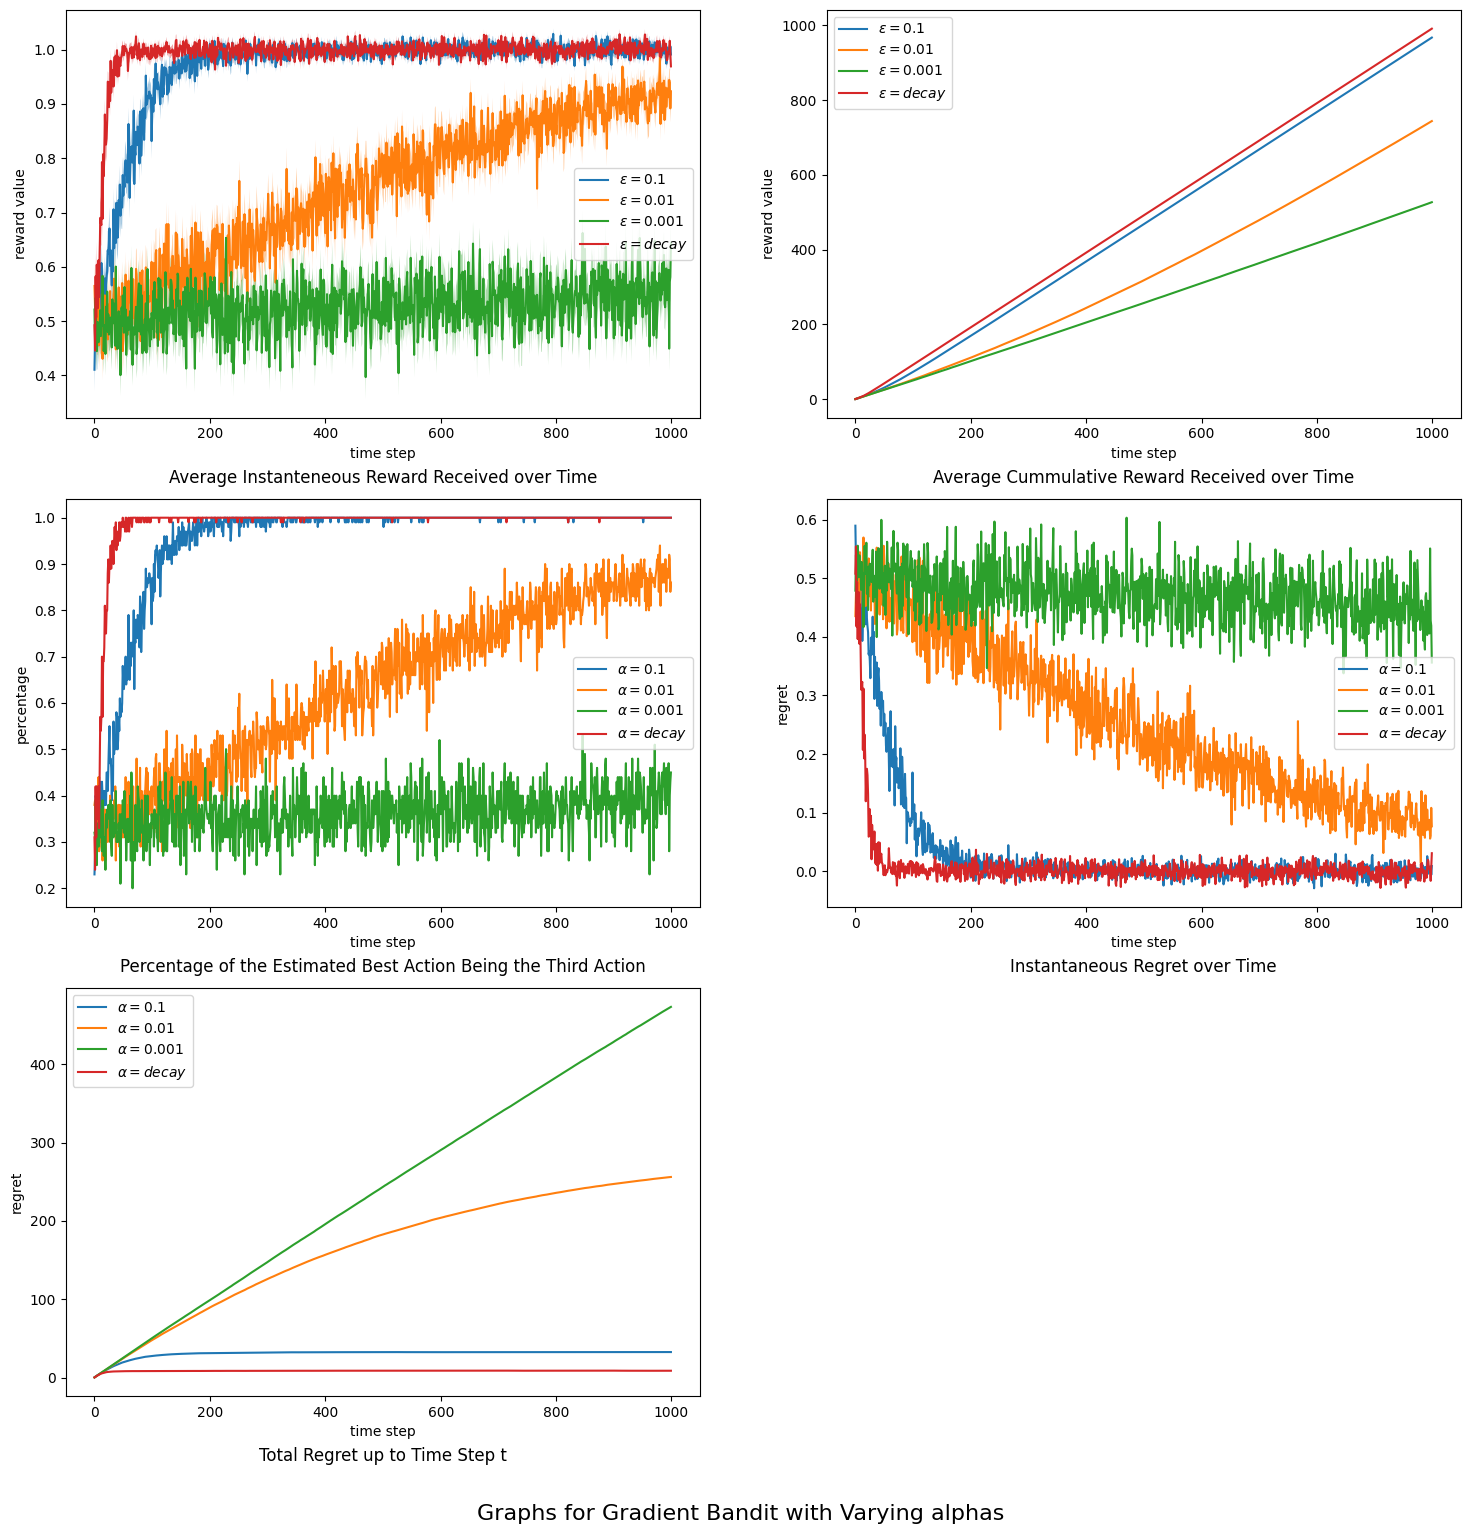

In [35]:

alphas = [0.1, 0.01, 0.001]
decaying_alpha_params = {'alpha_0': 1/2, 'lambda_': 0.01, 'p' : 1/2}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alpha in alphas + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if alpha == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient(
          three_arm_gaussian_bandit, 
          decaying_alpha_params['alpha_0'], 
          alpha_decay=True, 
          lambda_=decaying_alpha_params['lambda_'],
          p = decaying_alpha_params['p']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient(
          three_arm_gaussian_bandit, 
          alpha=alpha
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alpha)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alpha)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Gradient Bandit with Varying alphas'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

## Q7 Thompson Sampling

In [28]:
def thompson_sampling(bandit, mu = None, variance = None, num_time_step = 1000):
  """Thompson Sampling algorithm guassian bandits.

  Parameters
  ----------
  bandit : bandit class
      A gaussian bandit attributes num_arms and probs_arr, and method sample
  mu: initialization of the prior means
  variance: initialization of the prior variances

  Returns
  -------
  R_over_t
      a list of instantaneous reward over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  means = np.full(num_arms, mu)
  variances = np.full(num_arms, variance)
  rewards_per_arm = [[] for _ in range(num_arms)]
  best_action = 2 #Third action is the best action (index 2)

  total_R = 0 
  total_l = 0

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  

  for time_step in range(num_time_step):
    priors = []
    for n in range(num_arms):
        priors.append(np.random.randn()*np.sqrt(variances[n]) + means[n])
    
    A = np.argmax(priors)
    curr_R = bandit.sample(A)
    rewards_per_arm[A].append(curr_R)
    R_over_t.append(curr_R)

    for n in range(num_arms):
        means[n] = (1 / (1/variances[n] + 1/bandit.variance))*(means[n]/variances[n] + np.sum(rewards_per_arm[n])/bandit.variance)
        variances[n] = 1 / (1/variances[n] + 1/bandit.variance)


    total_R += curr_R 
    total_R_over_t.append(total_R)

    est_is_best = 1 if A == best_action else 0 
    est_is_best_over_t.append(est_is_best)

    l_t = bandit.mean[best_action] - np.mean(rewards_per_arm[A]) #Expectation of best move (mean) - Reward. Proof in page: 39 of book.
    l_over_t.append(l_t)

    total_l += l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

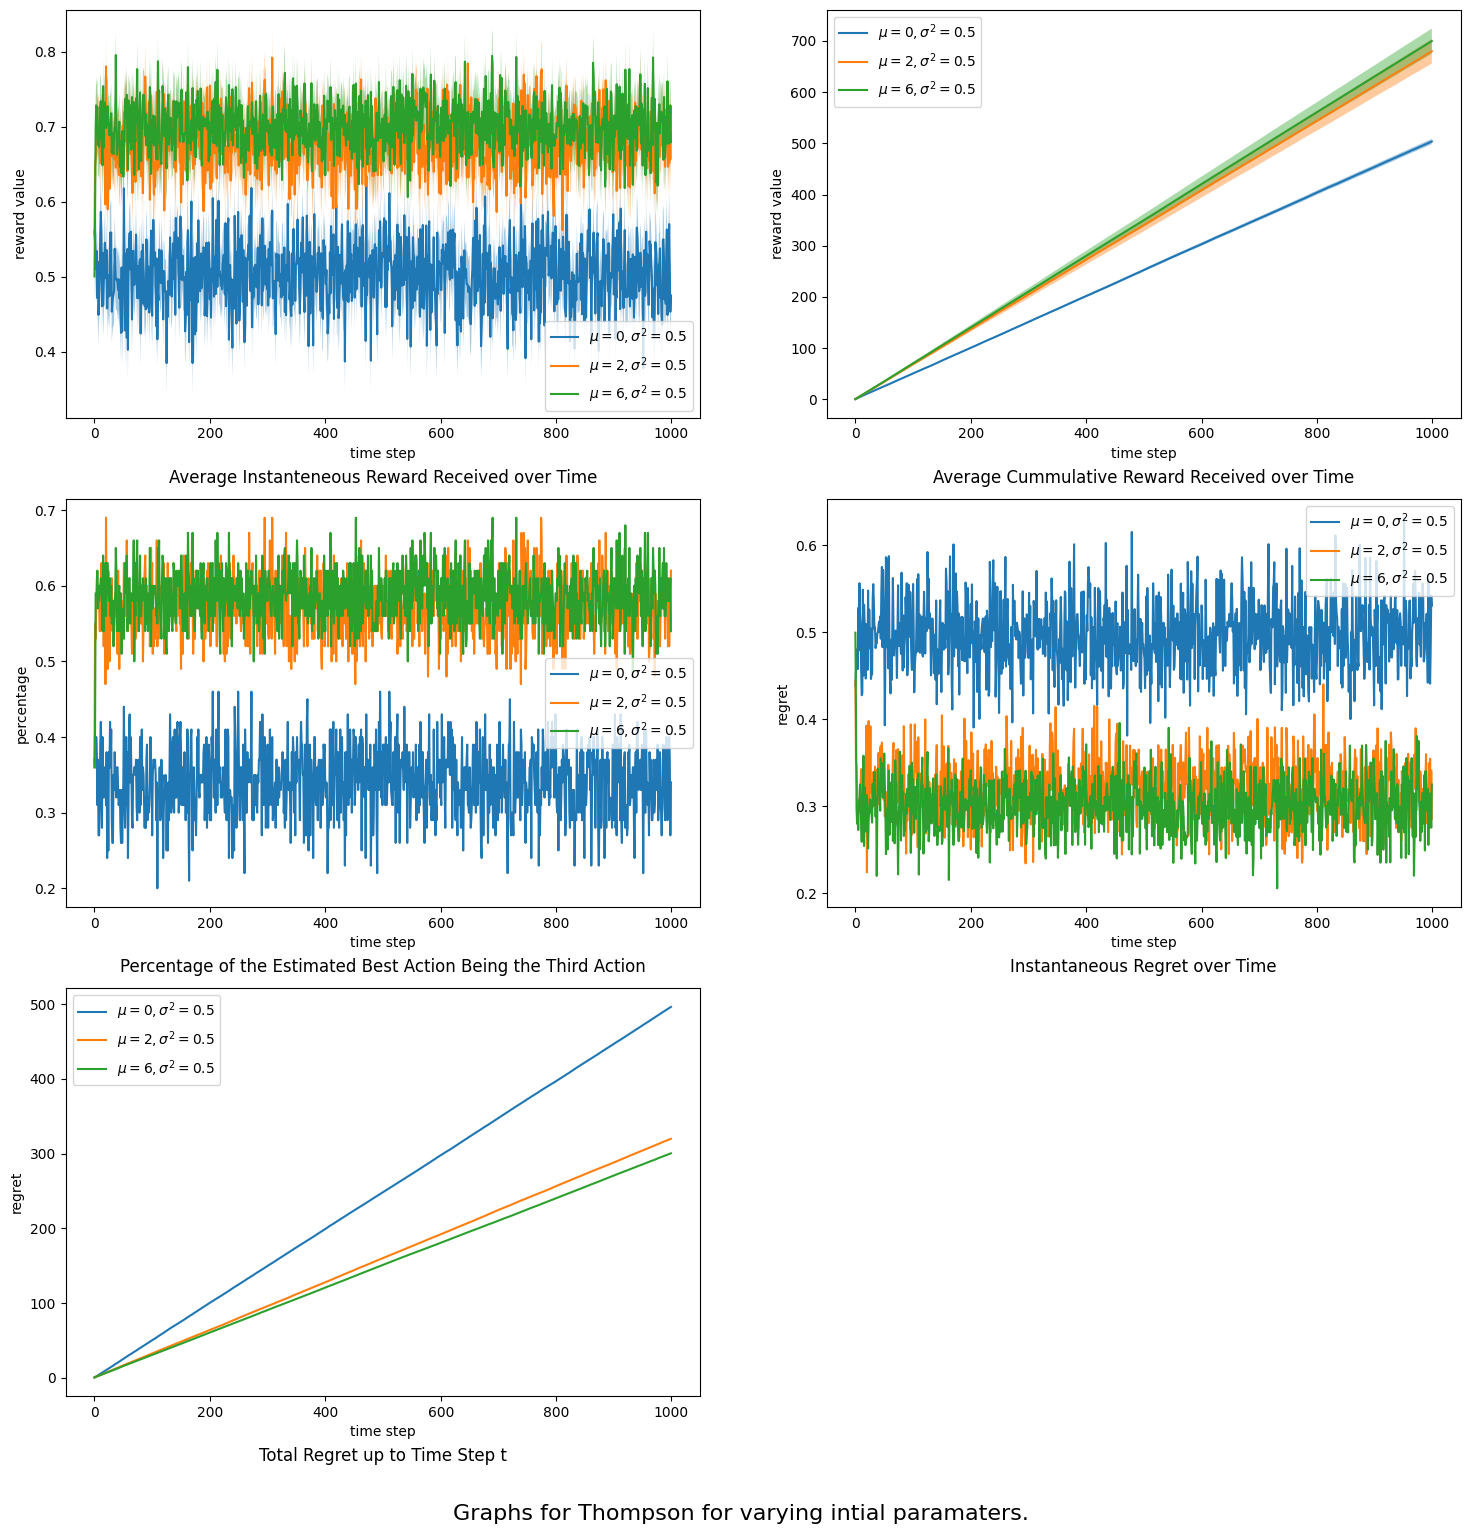

In [30]:
paramaters = [{'mu_0': 0, 'variance_0': 0.5}, {'mu_0': 2, 'variance_0' : 0.5}, {'mu_0' : 6, 'variance_0' : 0.5}]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for param in paramaters:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = thompson_sampling(
        three_arm_gaussian_bandit, 
        param['mu_0'], 
        param['variance_0']
    )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\mu = %s, \sigma^2 = %s$" % (param['mu_0'], param['variance_0']))

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\mu = %s, \sigma^2 = %s$" % (param['mu_0'], param['variance_0']))

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\mu = %s, \sigma^2 = %s$" % (param['mu_0'], param['variance_0']))

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\mu = %s, \sigma^2 = %s$" % (param['mu_0'], param['variance_0']))

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\mu = %s, \sigma^2 = %s$" % (param['mu_0'], param['variance_0']))

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Thompson for varying intial paramaters.'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

## Q8 Comparison of Algorithms

For epsilon-greedy we use epsilon-decay as the instantaneous and total-regret is much lower in exponential moving average (alpha). Similarly, for gradient-bandit we choose the hyperparamaters of alpha decay as the regret, reward and percentage of action 3 all perform best with it. Finally, for thompson-sampling we choose to initalize our gaussian prior with mean of 6, and variance of 0.5. This combination created the least instantaneous and total-regret over time.  

### Graphs

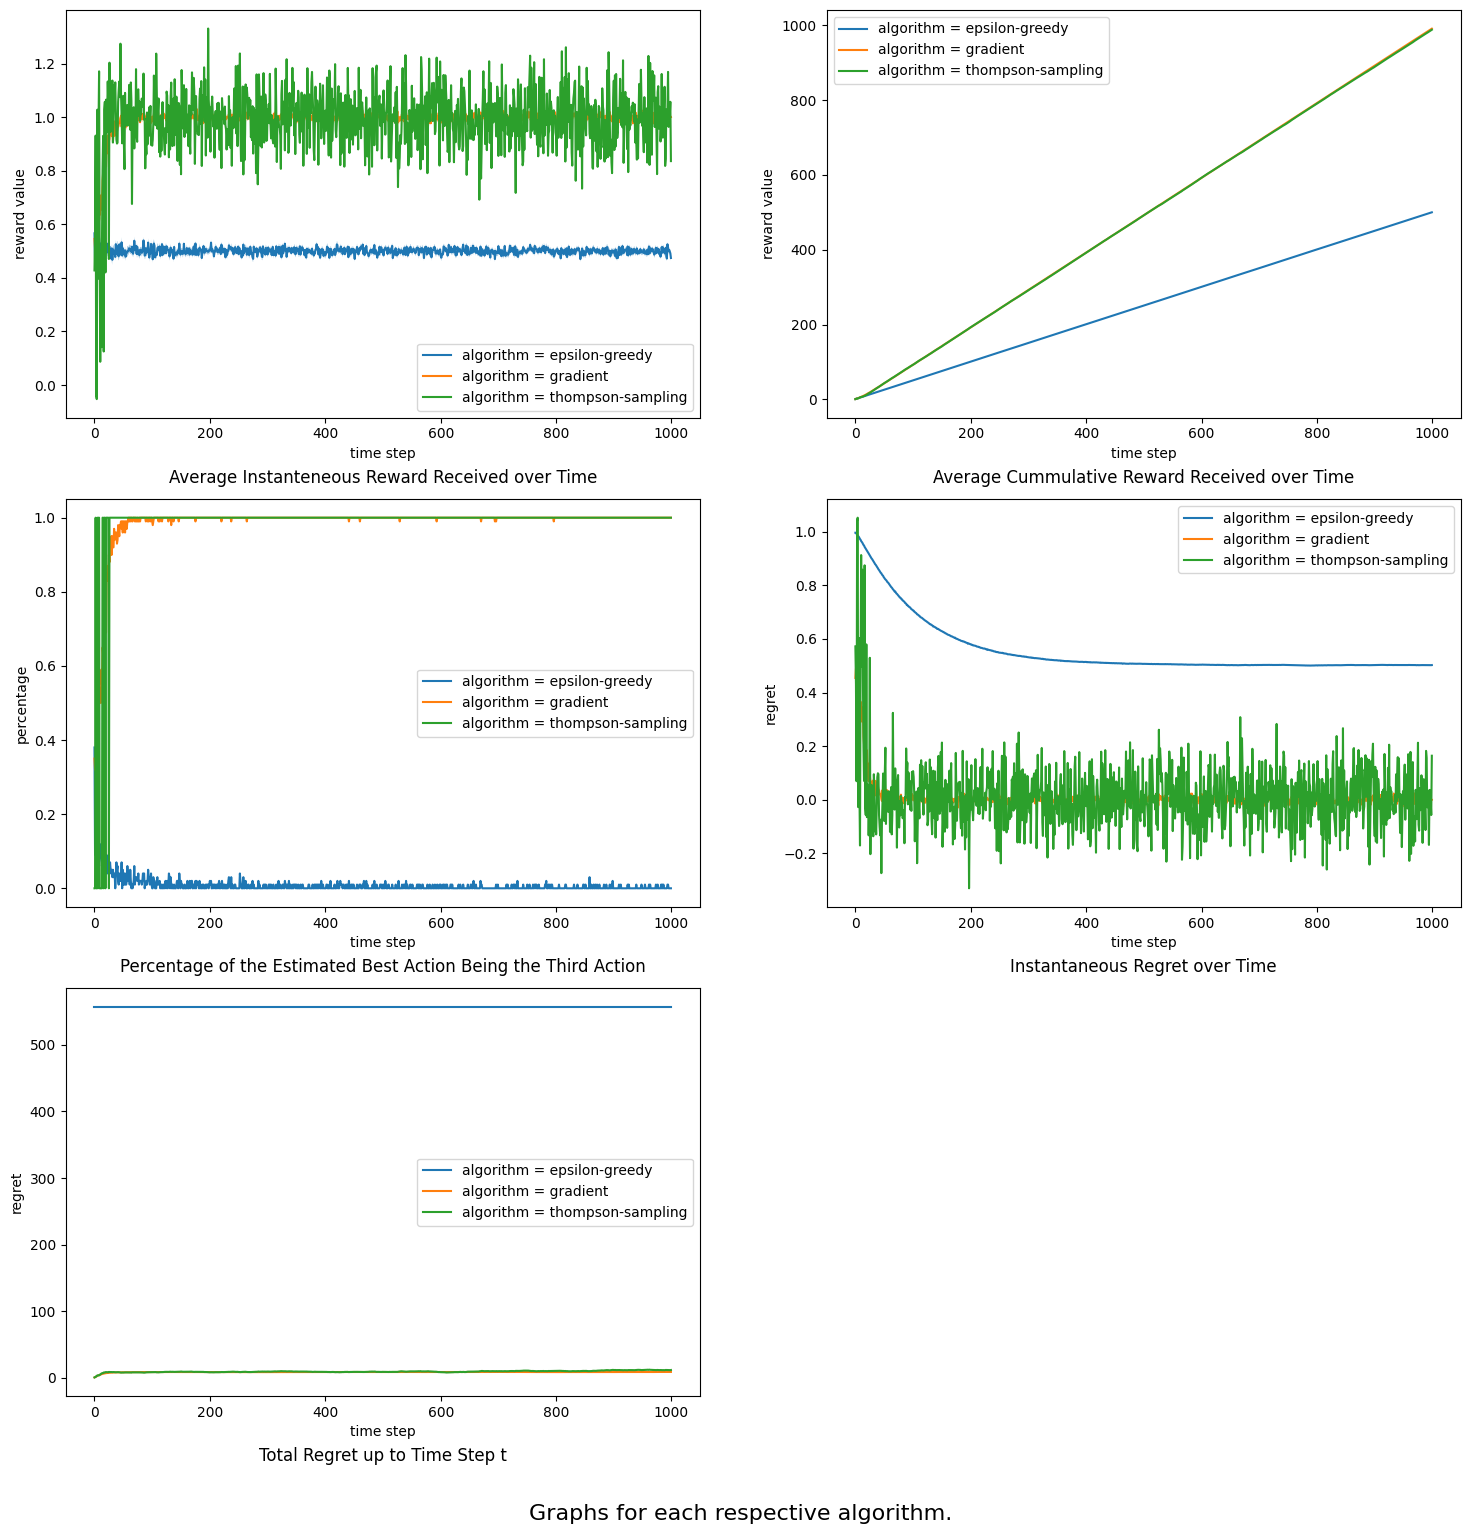

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
funcs = ["epsilon-greedy", "gradient", "thompson-sampling"]
param = {'mu_0': 6, 'variance_0': 0.5}
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters
alpha = 0.01
decaying_alpha_params = {'alpha_0': 1/2, 'lambda_': 0.01, 'p' : 1/2}  # Decaying epsilon parameters


for func in funcs:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if func == "thompson_sampling":
        R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = thompson_sampling(
            three_arm_gaussian_bandit, 
            param['mu_0'], 
            param['variance_0']
        )
    elif func == "epsilon-greedy":
       R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
           three_arm_gaussian_bandit, 
           decaying_epsilon_params['epsilon_0'], 
           epsilon_decay=True, 
           alpha=alpha, 
           lambda_=decaying_epsilon_params['lambda_']
       )
    elif func == "gradient":
        R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient(
          three_arm_gaussian_bandit, 
          decaying_alpha_params['alpha_0'], 
          alpha_decay=True, 
          lambda_=decaying_alpha_params['lambda_'],
          p = decaying_alpha_params['p']
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = f"algorithm = {func}")

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = f"algorithm = {func}")

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = f"algorithm = {func}")

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = f"algorithm = {func}")

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = f"algorithm = {func}")

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for each respective algorithm.'
fig.suptitle(title, fontsize=16, y=0.05)

plt.show()

### Answers

## Q9 Non-stationary Environment

### Answers